<a href="https://colab.research.google.com/github/devmedeiros/Challenge-Data-Science/blob/main/AluraVoz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Data Science - Alura Voz

# First Week

## Data Cleaning

First, we need to load the data and the libraries.

In [2]:
import pandas as pd
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
data = pd.read_json(url)
data.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
customer = pd.json_normalize(data.customer)
phone = pd.json_normalize(data.phone)
internet = pd.json_normalize(data.internet)
account = pd.json_normalize(data.account)
data.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)
data = pd.concat([data, customer, phone, internet, account], axis=1)
data.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Now that the dataset is well-formatted, let's look for missing data. I noticed that in the `Churn` column there was empty space that python was considering `NaN`. Also, the `Charges.Total` had white space not being counted as a null value, so I replaced those before counting the missing data.

In [5]:
data.replace('', np.nan, inplace=True)
data.replace(' ', np.nan, inplace=True)
data.isnull().sum()

customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64

I suspect that the missing `Churn` means that the reason a client is not part of the company is not by choice. Maybe this assumption is not true and is just an error, but either way, I think is better to not consider this missing data. The empty `Charges.Total` represents a customer that hasn't paid anything yet, so we can just fill the empty values with zero.

In [6]:
data[data['Charges.Total'].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [7]:
data['Charges.Total'].fillna(0, inplace=True)
data['Charges.Total'] = pd.to_numeric(data['Charges.Total'])

In [8]:
data.dropna(inplace=True)

# Second Week

## Data Analysis

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

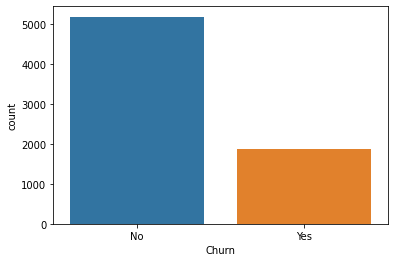

In [10]:
sns.countplot(x="Churn", data=data)

In [11]:
columns = [
            'gender',
            'SeniorCitizen',
            'Partner',
            'Dependents',
            'PhoneService',
            'MultipleLines',
            'InternetService',
            'OnlineSecurity',
            'OnlineBackup',
            'DeviceProtection',
            'TechSupport',
            'StreamingTV',
            'StreamingMovies',
            'Contract',
            'PaperlessBilling',
            'PaymentMethod'       
]

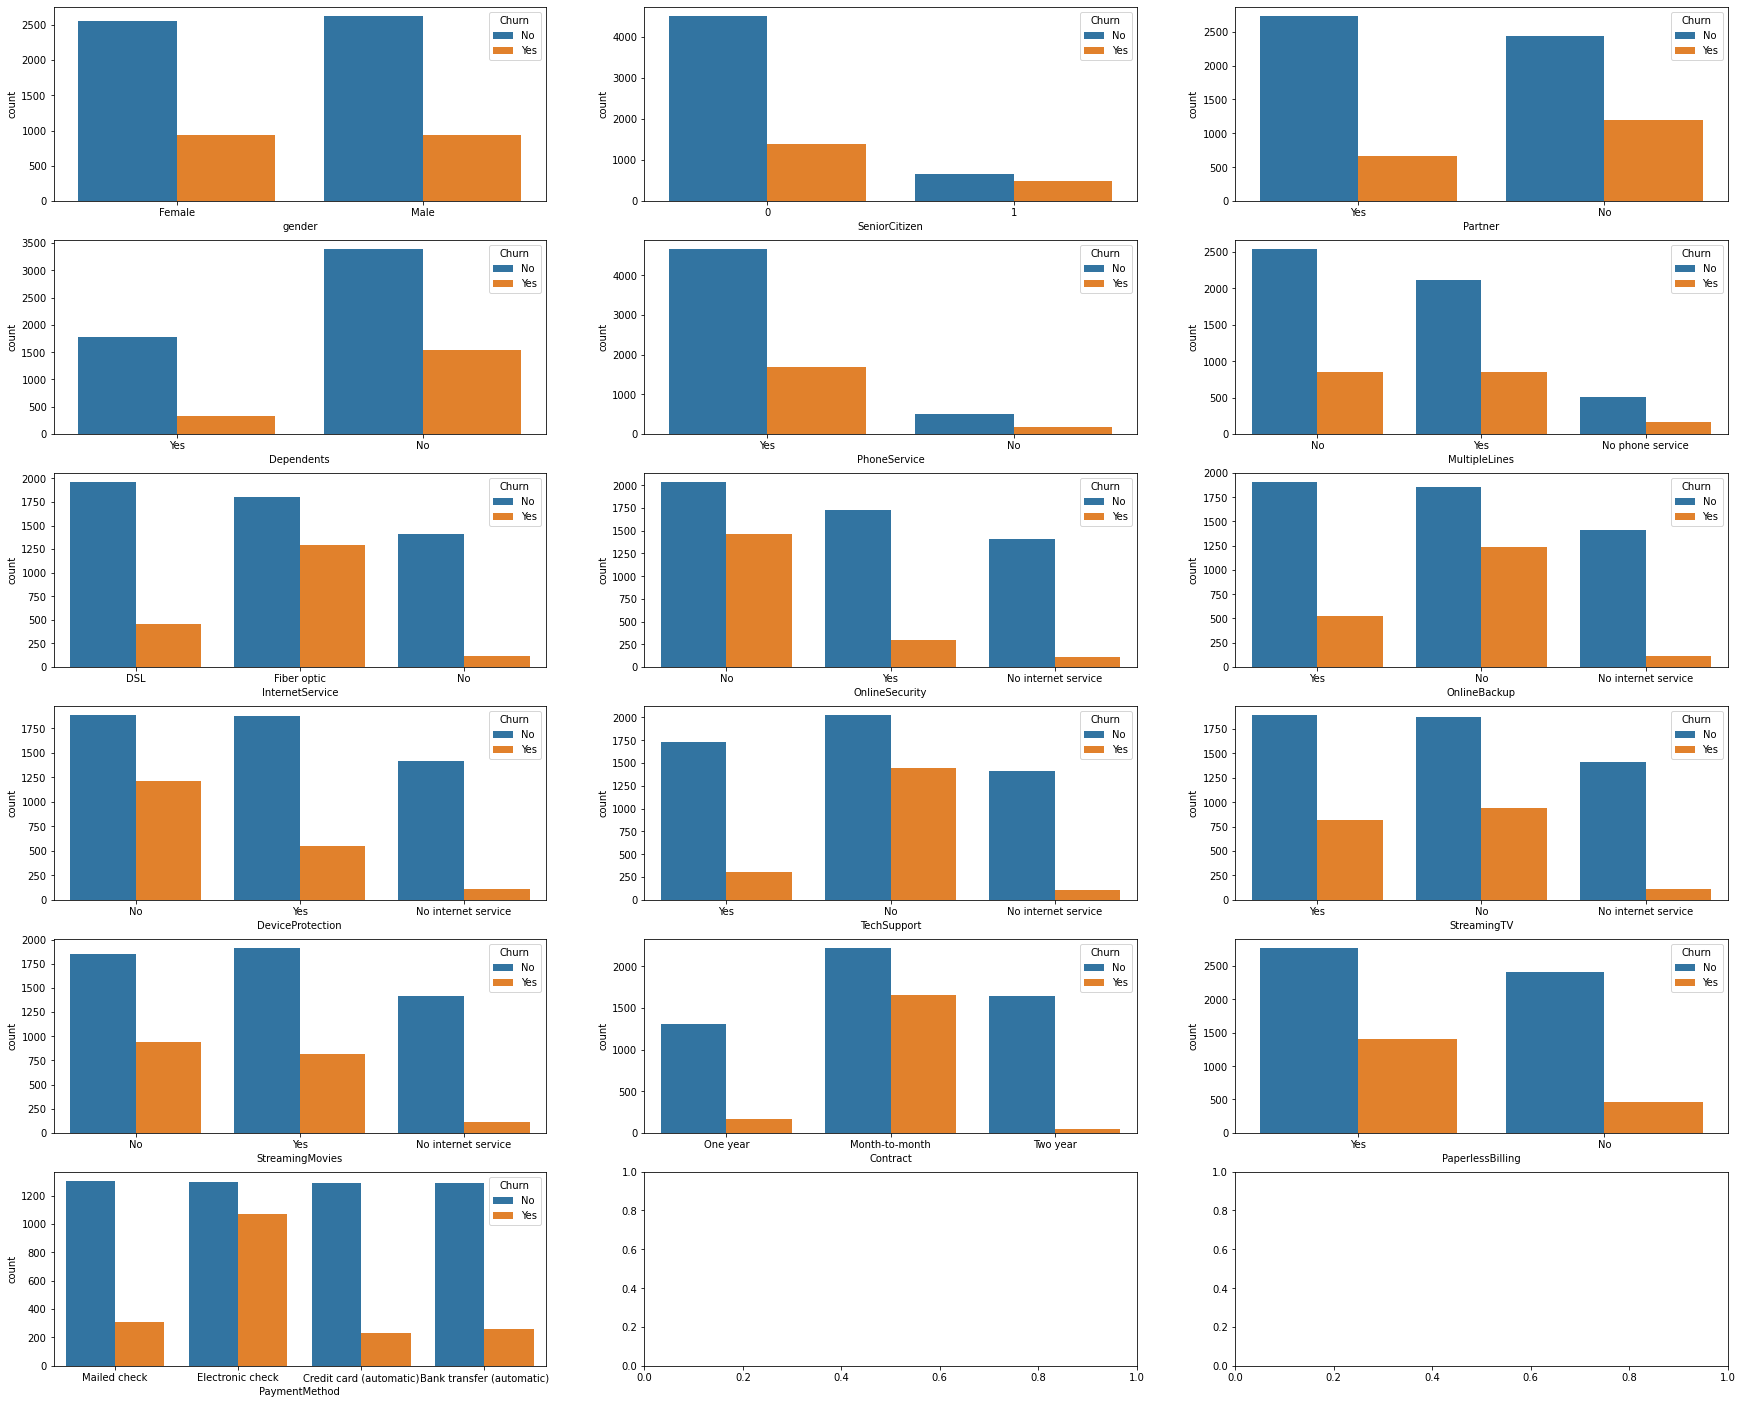

In [12]:
fig, axs = plt.subplots(ncols=3, nrows=6, figsize=[30,25])
axs = axs.flatten()
i=0
for column in columns:
  sns.countplot(x=column, hue='Churn', data=data, ax=axs[i])
  i = i + 1

Looking at the graphs at glance we can see that the payment method, contract, tech support, online backup and, internet service, seem to be defining factors in whether or not the client leaves the company.

Looking at the `TechSupport` data we can see that the clients that left the company didn't sign it. So they had a long waiting time when looking for assistance, which made the customers more likely to leave the company.

Using `Electronic check` as a payment method is prevalent among customers that leave Alura Voz. As well as a monthly contract.

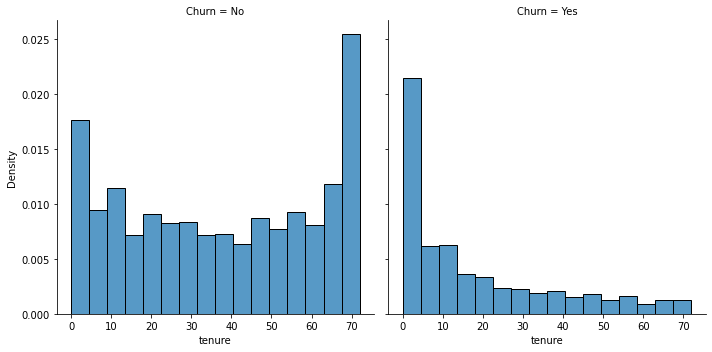

In [13]:
sns.displot(data, x='tenure', col='Churn', stat="density")

The likelihood for a client to drop the company is higher in the first month, this probability drops by more than half after five months, and continues to drop slowly afterward.

In [14]:
print("Average tenure for clients that didn't churn: {:.2f}\nAverage tenure for clients that did churn: {:.2f}".format(data.tenure[data.Churn == 'No'].mean(), data.tenure[data.Churn == 'Yes'].mean()))

Average tenure for clients that didn't churn: 37.57
Average tenure for clients that did churn: 17.98


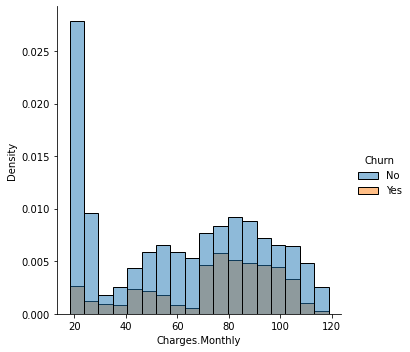

In [15]:
sns.displot(data, x='Charges.Monthly', hue='Churn', stat="density")

In [16]:
print("Average monthly charges for clients that didn't churn: {:.2f}\nAverage monthly charges for clients that did churn: {:.2f}".format(data['Charges.Monthly'][data.Churn == 'No'].mean(), data['Charges.Monthly'][data.Churn == 'Yes'].mean()))

Average monthly charges for clients that didn't churn: 61.27
Average monthly charges for clients that did churn: 74.44


It looks like the clients who were paying the highest monthly were more likely to churn. Maybe it's due to their prefared monthly contract.

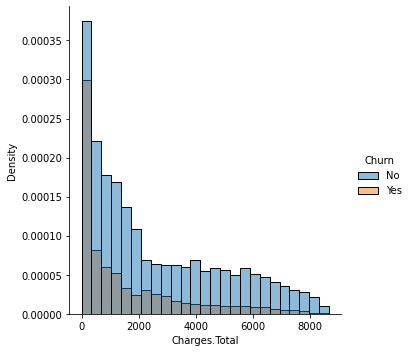

In [17]:
sns.displot(data, x='Charges.Total', hue='Churn', stat="density")

## The Churn Profile

New clients are more likely to churn than old clients.

Customers that use fewer services and products tend to leave the company. Also, when they aren't tied down to a longer contract they seem to be more likely to quit.

Regarding the payment method, clients that churn have a **strong** preference for electronic checks and usually are spending 13.17 monetary units than the average client that didn't leave.